Improting Libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

Import Dataset

In [8]:
phishdata = pd.read_csv('Datasets/selected_dataset.csv')

Random Forest Tree classifier with max depth of 5

In [9]:
# Split Data
x = phishdata.iloc[:, 2:-1]
y = pd.DataFrame(phishdata['status'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=45) 
# Random Forest Training
rf_all_features_md5 = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=5,max_features=7)
rf_all_features_md5.fit(X_train, y_train)
accuracy_score(y_test, rf_all_features_md5.predict(X_test))# accuracy

c:\Users\nonoc\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9294422827496758

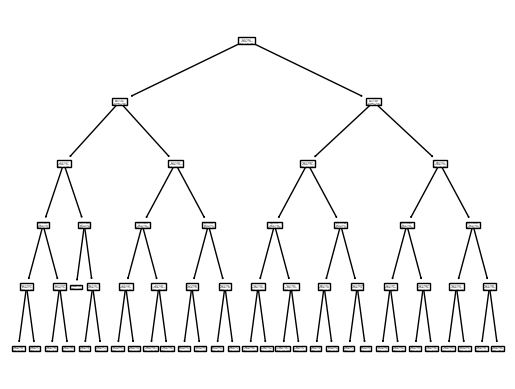

In [4]:
tree.plot_tree(rf_all_features_md5.estimators_[0]) #show the first tree in the random forest
plt.show()

Creating a Random Forest Tree Classifier with max depth 6

In [5]:
rf_all_features_md6 = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=6,max_features=7)
rf_all_features_md6.fit(X_train, y_train)
accuracy_score(y_test, rf_all_features_md6.predict(X_test))# accuracy

c:\Users\nonoc\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9361867704280156

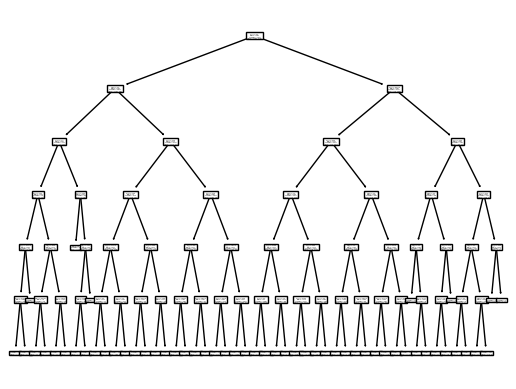

In [6]:
tree.plot_tree(rf_all_features_md6.estimators_[0]) #show the first tree in the random forest
plt.show()

We can see that increasing the max depth of the tree increases the accuracy. We can find the optimal depth of the tree by performing tests across different depths and choosing the highest accuracy.

In [23]:
model_list = []
result_list = []
# create 19 different classifiers with max depth from 1 to 19
for x in range(1,20):
    model_list.append(RandomForestClassifier(random_state=0, n_estimators=100, max_depth=x))
# for each of the classifiers, add the accuracy to result list
for y in range(19):
    model_list[y].fit(X_train, y_train.values.ravel())
    result_list.append(accuracy_score(y_test, model_list[y].predict(X_test)))

Text(0.5, 1.0, 'accuracy against depth of tree')

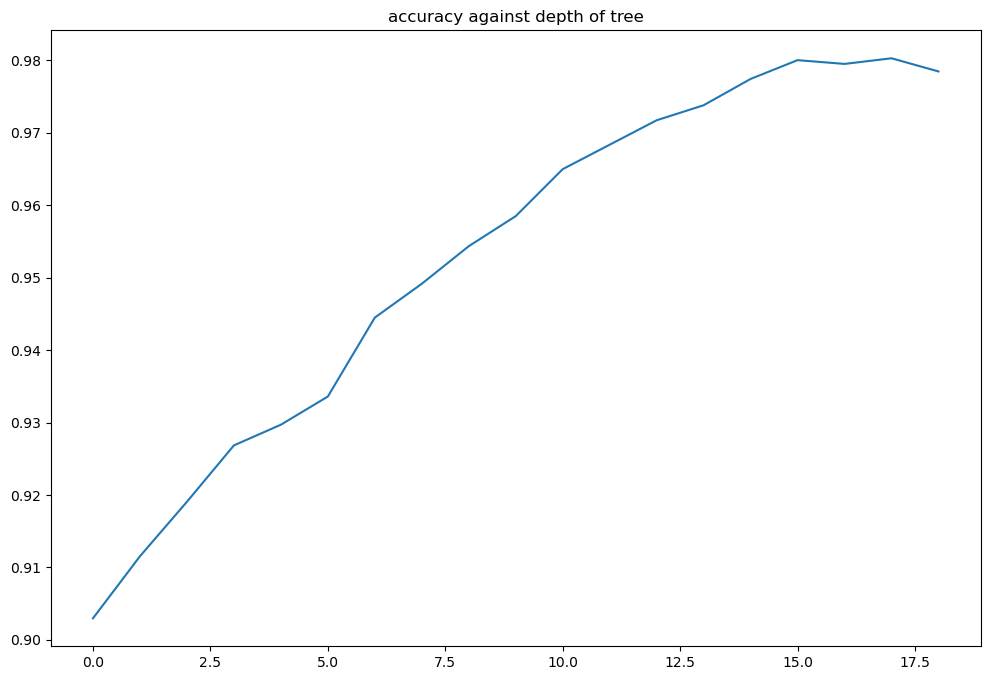

In [28]:
h = plt.figure(figsize=(12, 8))
sb.lineplot(result_list).set_title("accuracy against depth of tree")

we can see that accuracy starts falling after depth 15. We then use depth 15 as the best model for Random Forest Regression.

accuracy of depth 15 tree:0.977431906614786


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual'),
 Text(0.5, 1.0, 'Testing Performance')]

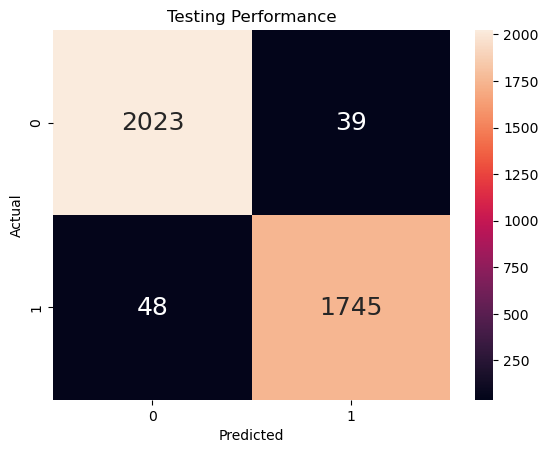

In [37]:
print("accuracy of depth 15 tree:" + str(result_list[14]))

pred = model_list[14].predict(X_test)

from sklearn.metrics import confusion_matrix
p = sb.heatmap(confusion_matrix(y_test, pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
p.set(xlabel='Predicted', ylabel='Actual', title='Testing Performance')